In [1]:
# Dataset
# Reuters dataset, a set of short newswires and their topic
# There are 46 different topics
from keras.datasets import reuters

# num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
print(len(train_data), train_data.shape)
print(len(test_data), test_data.shape)

8982 (8982,)
2246 (2246,)


In [4]:
print('x:', train_data[10])
print('y:', train_labels[10])

x: [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
y: 3


In [5]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [6]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
# Preparing the data
import numpy as np

# vectorize the input
# dimension 10000, one dimension per word
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s. sequence holds a list of indexes
        results[i, sequence] = 1.
    return results

# Vectorized training data
x_train = vectorize_sequences(train_data)

# Vectorized test data
x_test = vectorize_sequences(test_data)

In [8]:
print(x_train[0])
print(x_train.shape)

[0. 1. 1. ... 0. 0. 0.]
(8982, 10000)


In [13]:
# vectorize the labels using one-hot encoding
# In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

# dimension 46. one for each category/topic
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
print(one_hot_train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [19]:
print(one_hot_train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
# Building your network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# You end the network with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. 
# Each entry in this vec- tor (each dimension) will encode a different output class
model.add(layers.Dense(46, activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647214 (2.47 MB)
Trainable params: 647214 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [23]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 15ms/step - loss: 2.7371 - accuracy: 0.5071 - val_loss: 1.7987 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.4517 - accuracy: 0.7011 - val_loss: 1.2946 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0522 - accuracy: 0.7788 - val_loss: 1.1079 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8363 - accuracy: 0.8222 - val_loss: 1.0161 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6685 - accuracy: 0.8586 - val_loss: 0.9361 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5361 - accuracy: 0.8906 - val_loss: 0.9028 - val_accuracy: 0.8190
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.4324 - accuracy: 0.9100 - val_loss: 0.8813 - val_accuracy: 0.8170
Epoch 8/20
16/16 [=

In [26]:
# See the history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

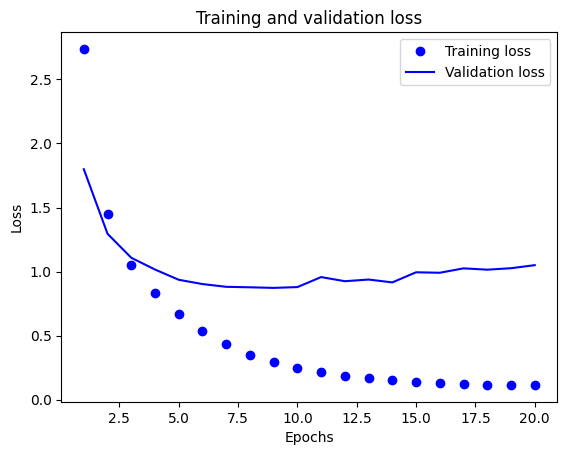

In [27]:
# Visualize the loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

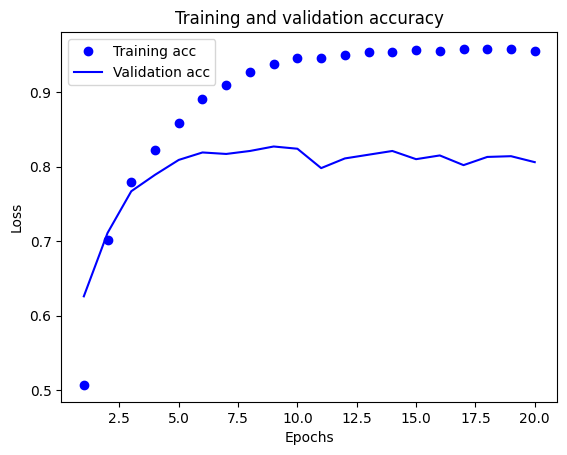

In [28]:
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 615us/step - loss: 1.2039 - accuracy: 0.7921
[1.2038888931274414, 0.7920747995376587]


In [30]:
# predict
predictions = model.predict(x_test)

71/71 [==============================] - 0s 527us/step


In [31]:
# Each entry in predictions is a vector of length 46
print(predictions.shape)

(2246, 46)


In [32]:
# The largest entry is the predicted class—the class with the highest probabilit
np.argmax(predictions[0])

3

In [34]:
# The coefficients in this vector sum to 1
print(np.sum(predictions[0]))

0.9999998
